In [111]:
import pandas as pd
import matplotlib.pylab as plt
from	sklearn.cluster	import	KMeans
from scipy.spatial.distance import cdist 

%matplotlib inline

In [112]:
crime = pd.read_csv('crime_data.csv')

In [113]:
crime.head(10)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,0,13.2,236,58,21.2,1
1,1,10.0,263,48,44.5,3
2,2,8.1,294,80,31.0,3
3,3,8.8,190,50,19.5,2
4,4,9.0,276,91,40.6,3
5,5,7.9,204,78,38.7,3
6,6,3.3,110,77,11.1,0
7,7,5.9,238,72,15.8,2
8,8,15.4,335,80,31.9,3
9,9,17.4,211,60,25.8,1


In [87]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)


In [91]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(crime.iloc[:,1:])


In [92]:
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


In [93]:
###### screw plot or elbow curve ############
k = list(range(2,9))
k
TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(df_norm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))

([<matplotlib.axis.XTick at 0x2824f01c0f0>,
 <a list of 7 Text xticklabel objects>)

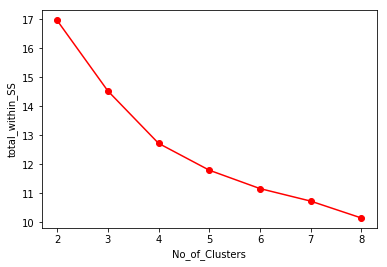

In [94]:
# Scree plot 
plt.plot(k,TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k)


In [95]:
# Selecting 5 clusters from the above scree plot which is the optimum number of clusters 
model=KMeans(n_clusters=5) 
model.fit(df_norm)

model.labels_ # getting the labels of clusters assigned to each row 
md=pd.Series(model.labels_)  # converting numpy array into pandas series object 
crime['clust']=md # creating a  new column and assigning it to new column 
df_norm.head()


,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [96]:
crime = crime.iloc[:,1:]
crime.iloc[:,1:].groupby(crime.clust).mean()
crime.to_csv("crime_data.csv")


In [110]:
crime.head(50)

,Murder,Assault,UrbanPop,Rape,clust
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,3
2,8.1,294,80,31.0,3
3,8.8,190,50,19.5,2
4,9.0,276,91,40.6,3
5,7.9,204,78,38.7,3
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,2
8,15.4,335,80,31.9,3
9,17.4,211,60,25.8,1
